<Body>


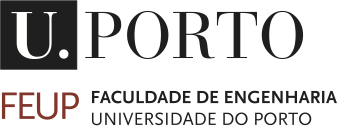   
<h1> <b>Machine Learning 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt),
**Daniel Campos** (dfcampos@fe.up.pt),
**Maria Inês Pereira** (maria.ines@fe.up.pt)

FEUP, Feb. 2024

---


# Notebook 10: Short Introduction to Unsupervised Learning and K-Means

## Introduction

Unsupervised learning is a way to discover information hidden in the data, by learning the underlying regularities and the statistical structure of the data. Unsupervised means that no labelling information nor probabilistic model is known about the dataset.

One of the most important types of unsupervised learning is clustering. Generically, the goal of clustering is to group points, that is, to unravel the way in which the points in a data set are grouped, assuming that such a group structure exists, according to some sort of similarity.

This notebook will be presenting **K-Means** algorithm. K-Means is an unsupervised learning clustering algorithm, different from K Nearest Neigbour (KNN) that is a supervised learning classification algorithm. K-Means creates classes out of unlabeled data while KNN classifies data to available classes from labeled data.

K-Means is a two step algoritm:
1. Calculation of centroids using the average of all points assigned to a specific cluster.
* Calculation of the responsability which is the new assignment configuration since there are new centroid estimations. Each point is assigned to a cluster that is closer.



## K-Means Algorithm

Formally, the K-Means algorithm is presented as:


1. Initialize
    * Select the number of clusters K.
    * Set $\mu_k$ to random values where k = {1, 2,... and K}
2. For all data points $x_n$, where n = {1, 2,... and N}:
    * Identify the centroid ($μ_k$) that is closest to the data point $x_n$.
    * Assign the data point $x_n$ to the list of data points already assigned to cluster k.
3. For all k:
    * Update $μ_k$ as the mean of all the points belonging to it.
    
4. Repeate 2 and 3 until no change in centroids ($μ_k$) occurs between two successive iterations.

where
* $μ_k$ is the centroid of the cluster
* $x_n$ refers to data points



Reference: \\
[1] Theodoridis S - Machine learning. A Bayesian and optimization perspective-Elsevier (2020) - chapter 12 - specifically algorithm 12.1

More Information: \\
[2] https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb

[3] https://colab.research.google.com/github/SANTOSHMAHER/Machine-Learning-Algorithams/blob/master/K_Means_algorithm_using_Python_from_scratch_.ipynb

[4] https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c


# Initialization and DataSet Creation

In [1]:
# Initializations

import random
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

random.seed(3)
%precision 4


'%.4f'

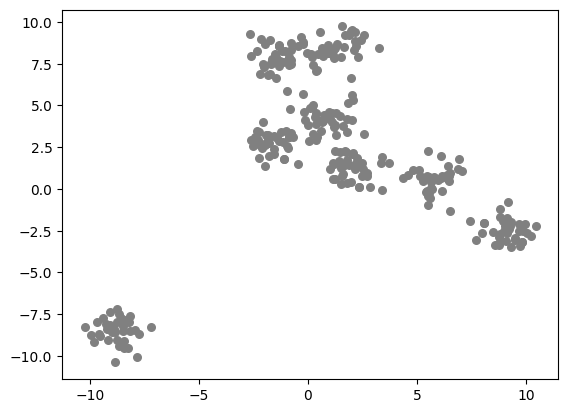

In [2]:
### DataSet Creation - 2D points ###

# "Global" - define here for the whole notebook:
n_clusters = 8

X, y_true = make_blobs(n_samples=300, centers=n_clusters,
                       cluster_std=0.70, random_state=0)

# To emphasize that this is an unsupervised algorithm,
# we will leave the labels out of the visualization
plt.scatter(X[:, 0], X[:, 1], s=30, c='grey');

# To show the ground truth of the blobs (y_true as colors) uncomment line below
#plt.scatter(X[:, 0], X[:, 1], c=y_true, s=2, cmap='Set1')


# Activity 1

Implement manually the K-Means algorithm for any value of K (number of clusters) and considering 2D data points.

In [3]:
# To complete

def kmeans_func(X_func, K_func, show_plot=0, ini_method=0):
  '''
    X_func are sample points;
    K_func is the number of clusters;
    showplot 0/1 - not / show centroid evolution over iterations;
    ini_method 0/1 - ini centroids 0=> with random within data bounderies or 1=>from the initial points (risky!)
  '''
  cluster = np.zeros(X_func.shape[0],dtype=int)

  centr_ini = []

  if ini_method:  # 1 is points, 0 is random
    # Initial centroids are sample points (risky!)
    for i in range(K_func):
      centr_ini.append(X_func[i])
  else:
    # Non absurd Random Initial Centroids
    max0 = max(X_func[:,0]);
    min0 = min(X_func[:,0]);
    max1 = max(X_func[:,1]);
    min1 = min(X_func[:,1]);

    for i in range(K_func):
      centr_ini.append([random.uniform(min0,max0),random.uniform(min1,max1)])

  iter = 0
  diff = 1
  centroids = centr_ini
  centr_list = [centroids]

  while diff:
    # for each sample
    for sample_i, sample_pt in enumerate(X_func):
      min_dist = float('inf')
      # dist of the point from all centroids
      for centroid_i, centroid in enumerate(centroids):
        dist =  ''' --- complete HERE --- '''
        # store closest centroid
        if ''' --- complete HERE --- ''':
          ''' --- complete HERE --- '''
          ''' --- complete HERE --- '''

    sum = np.zeros((K_func,2))
    cnt = np.zeros(K_func)
    for sample_i, sample_pt in enumerate(X_func):
      sum[cluster[sample_i]] += X_func[sample_i]
      cnt[cluster[sample_i]] += 1
    new_centroids = np.zeros((K_func,2))
    for k in range(K_func):
      if (cnt[k]>0):
        new_centroids[k] = sum[k] / cnt[k]
      else:
        # hopefully, the next iteration will fix uninteresting centroid
        new_centroids[k] = [random.uniform(min0,max0),random.uniform(min1,max1)]



    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
      centr_list.append(new_centroids)
    iter = iter+1

  print("Number of iterations", iter)
  #print(centr_list)

  if show_plot: # pretty subplotting
    cols = min(iter,6) # max 6 plots
    fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(20,3))
    for col in range(min(cols,iter)):
      ax[col].scatter(X_func[:, 0], X_func[:, 1], s=3, c=np.zeros(X_func.shape[0]), cmap='Set2')
      i = round(iter/cols*col)
      if (col==cols-1):
        i = iter-1
      ## print("centr %s", i,"=>", centr_list[i])
      ## devia funcionar ### ax[row, col].scatter(centr_list[i][:,0], centr_list[i][:,1], c='black', s=200, alpha=0.5);
      for j in range(K_func):
        centr_plot_x = centr_list[i][j][0]
        centr_plot_y = centr_list[i][j][1]
        ax[col].scatter(centr_plot_x, centr_plot_y, c=j, s=60, alpha=0.3, cmap='Set1')
        ax[col].title.set_text("it " + str(i) )
    plt.show()

  return centroids, cluster


# call our kmeans_func with our data
centr, clust = kmeans_func(X, n_clusters, show_plot=1, ini_method=0)

plt.scatter(X[:, 0], X[:, 1], c=clust, s=3, cmap='Set1')
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=20, cmap='Set1', alpha=0.1)
plt.scatter(centr[:, 0], centr[:, 1], c='black', s=200, alpha=0.5);


#Local Minima

K-Means depends on the initial "random" position of the centroids.

The code below calls the same algorithm with different initial centroids.

Initial Random Centroids 1
Number of iterations 21


<ipython-input-4-c314c05be258>:75: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[col].scatter(X_func[:, 0], X_func[:, 1], s=3, c='grey', cmap='Set1')


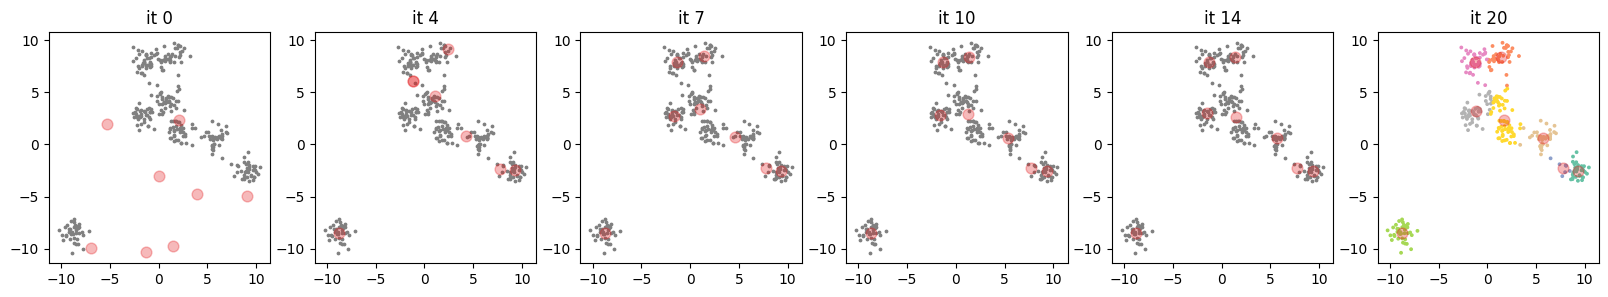

Initial Random Centroids 2
Number of iterations 14


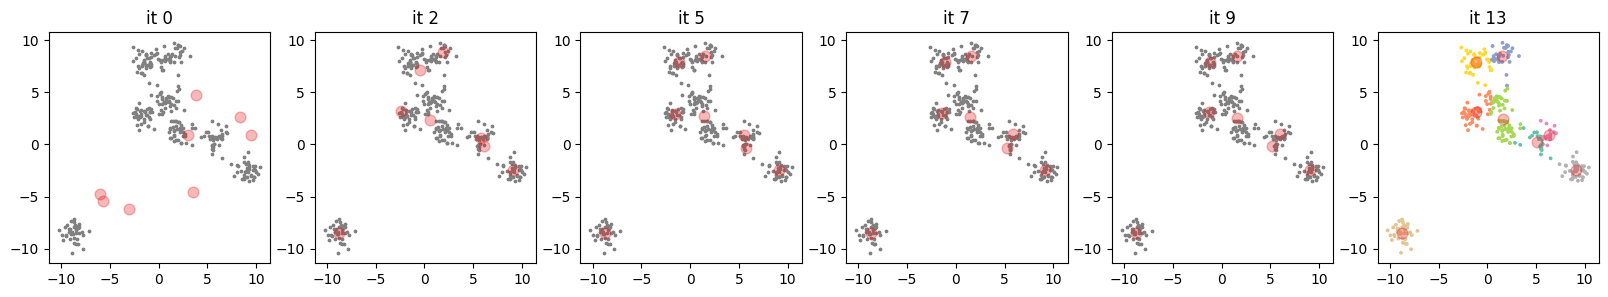

Initial Random Centroids (ini w/ data points)
Number of iterations 4


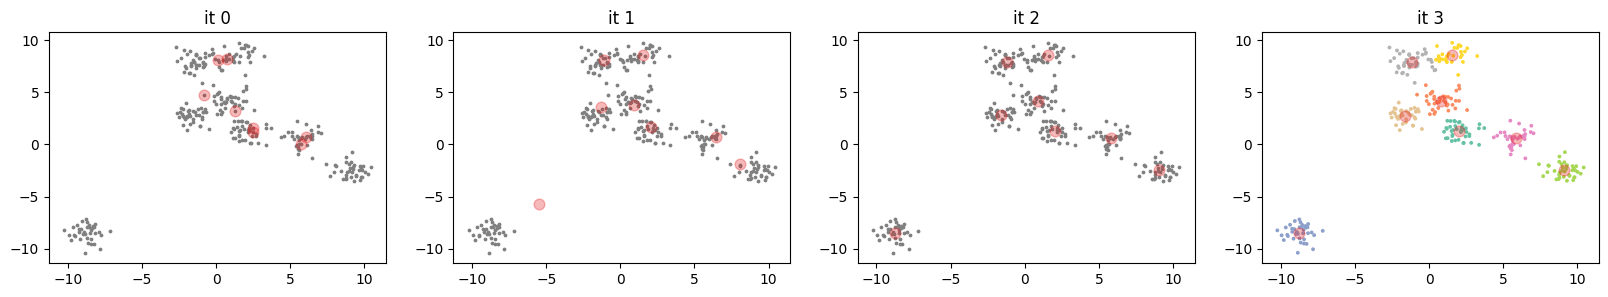

In [ ]:
# call several times our kmeans_func with our data, different ini centroids

# Demonstrate different initial random centroids 1/2
print("Initial Random Centroids 1")
centr, clust = kmeans_func(X, n_clusters, show_plot=1, ini_method=0)

# Demonstrate different initial random centroids 2/2
print("Initial Random Centroids 2")
centr, clust = kmeans_func(X, n_clusters, show_plot=1, ini_method=0)

# Demonstrate different initial centroids from data points
print("Initial Random Centroids (ini w/ data points)")
centr, clust = kmeans_func(X, n_clusters, show_plot=1, ini_method=1)


The above unexpected result is a limitation of the K-Means algorithm: there is a strong dependency on the initial values for the centroids (that are random) and the optimization will stop in local minima, yielding different clustering solutions.

Variations of the algorithm suggest multiple random tries to find a better solution. The global quality of a solution can be evaluated by the Sum of Squared Errors (SSE) for all data samples in a given clusterized arrangement.

Keep in mind that unsupervised learning is a complex task and it is most often not feasible to find the ideal global optimal solution.

## K-Means from the **sklearn** library

For additional execution speed, analyse the code below that uses the **K-Means** function from the **sklearn** library.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


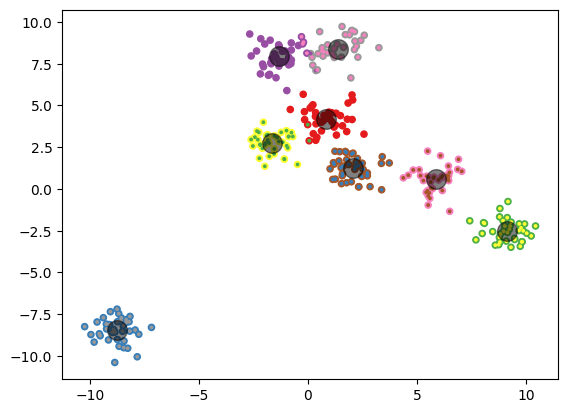

In [ ]:
from sklearn.cluster import KMeans
# Initialization
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Visual inspection is needed as colors (cluster number) may not match
# and this is no error as this is unsupervised learning
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='Set1')
plt.scatter(X[:, 0], X[:, 1], c=y_true,   s=3,  cmap='Set1')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Estimating the number of clusters - Elbow Method

In unsupervised machine learning, clustering algorithms are used to group similar data points together based on their feature similarities. One common challenge in clustering is determining the optimal number of clusters to use for a given dataset. The Elbow Method is a technique used to estimate the optimal number of clusters in a dataset for clustering algorithms such as K-means.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

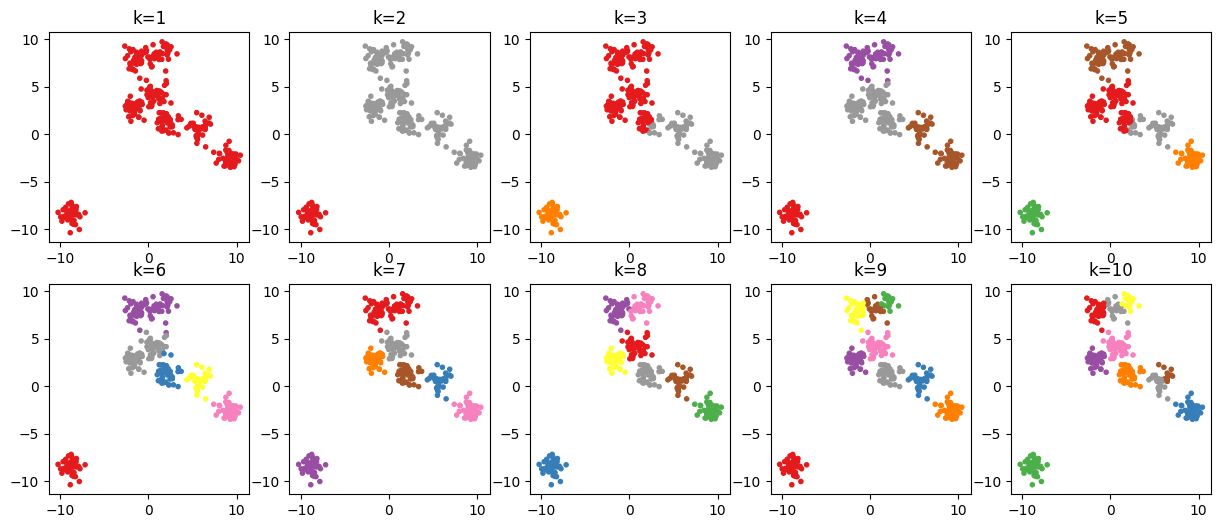

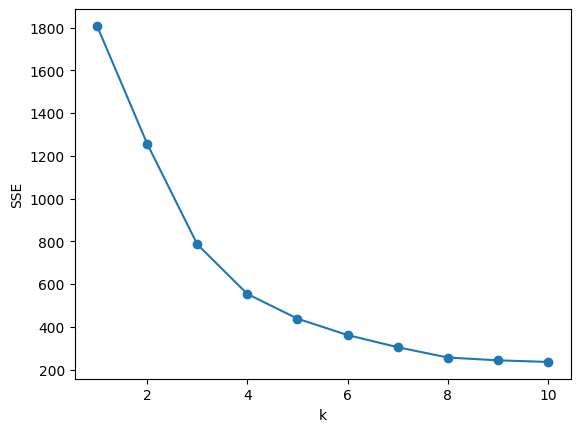

In [ ]:
### Estimating the number of clusters

def SSE(X, centroids, cluster):
  '''
    returns the Sum of Squared Error
    X are the 2D points
    centroids are the cluster centers
    cluster is the cluster that each data point belongs to
  '''
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[cluster[i], 0]-val[0])**2 +(centroids[cluster[i], 1]-val[1])**2)  ####
  return sum


cost_list = []
fig, ax = plt.subplots(2, 5, figsize=(15,6))
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    # Calculate SSE
    cost = SSE(X, centers, y_kmeans)
    cost_list.append(cost)
    ax[int((k-1)/5),(k-1)%5].title.set_text("k="+str(k))
    ax[int((k-1)/5),(k-1)%5].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=9, cmap='Set1')

fig, ax = plt.subplots(1, 1)
plt.plot(k_range, cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()


# Estimating the number of clusters - selecting of the best K

Selecting the best value for K is sometimes a human driven task, based on the "knee" (threshold and / or change in the derivative) of the above curve that plots Sum of Squared Error (SSE) against K.
Note that after the most adequate number of clusters, the SSE will not decrease much - if the clusters are well behaved.

To automate finding the best K, the following library might be usefull: https://pypi.org/project/kneed/



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

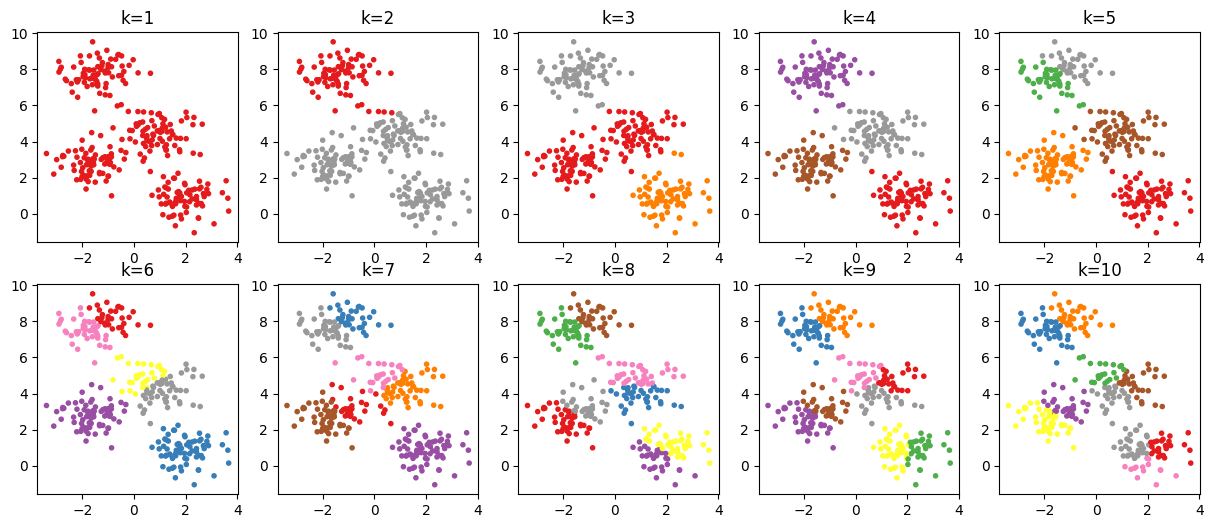

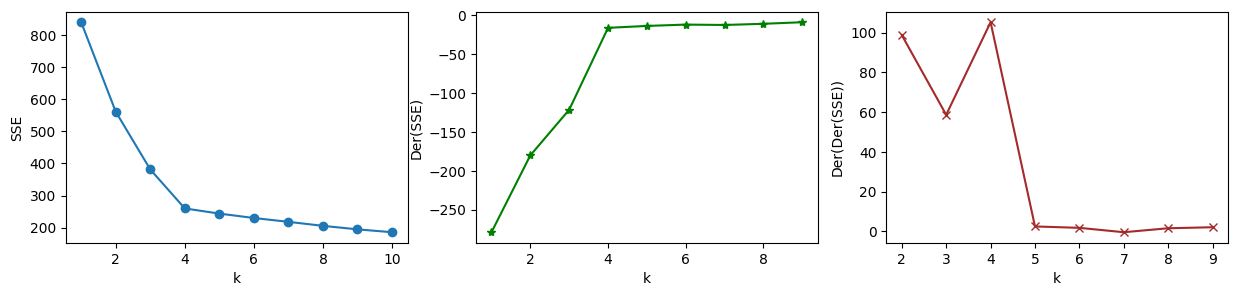

A simple approach (1) reveals that a good K is 4
A simple approach (2) reveals that a good K is 4
The real value of n_clusters is 4 (this would be unknown in a real problem)


In [ ]:
### Select best K


### DataSet Creation - 2D points -- this code is repetead from above


# Change here the number of clusters
n_clusters = 4

X, y_true = make_blobs(n_samples=300, centers=n_clusters,
                       cluster_std=0.70, random_state=0)

### Estimating the number of clusters -- this code is repetead from above

cost_list = []
fig, ax = plt.subplots(2, 5, figsize=(15,6))
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    # Calculate SSE
    cost = SSE(X, centers, y_kmeans)
    cost_list.append(cost)
    ax[int((k-1)/5),(k-1)%5].title.set_text("k="+str(k))
    ax[int((k-1)/5),(k-1)%5].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=9, cmap='Set1')


# Plot charts for SSE over K its derivate and its 2nd derivative

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,3))

axs[0].plot(k_range, cost_list, marker='o')
axs[0].set(ylabel='SSE')

der_list = []
der_range = range(1, max(k_range))
for i in der_range:
  der_list.append( cost_list[i]-cost_list[i-1] )
axs[1].plot(der_range, der_list, marker='*', c='green')
axs[1].set(ylabel='Der(SSE)')

der2list = []
der2range = range(2, max(k_range))
for i in der2range:
  der2list.append( der_list[i-1]-der_list[i-2] )
axs[2].plot(der2range, der2list, marker='x', c='brown')
axs[2].set(ylabel='Der(Der(SSE))')

for ax in axs.flat:
    ax.set(xlabel='k')

plt.show()



# Two very simple algorithms to select K

for i in reversed(der_range):
  if der_list[i-1] < -25:
    bestK = i+1
    break
print("A simple approach (1) reveals that a good K is", bestK)

bestK = -1;
for i in reversed(der2range):
  if der2list[i-2] > 25:
    bestK = i
    break
print("A simple approach (2) reveals that a good K is", bestK)

print("The real value of n_clusters is", n_clusters, "(this would be unknown in a real problem)")

# Characteristics of the K-means algorithm

K-Means is quite simple but effective for unsupervised learning.
It takes a single input: the number of clusters K.

As mentioned, the K-Means algorithm depends on the initial (random) centroids. Repeated execution will produce good results (global optimum?).

The main model assumption of K-Means is that points will be closer to their own cluster center than to others. This means that the algorithm will often be ineffective if the clusters have complicated geometries such as the cases of curved or non-compact or ring shaped clusters.

The algorithm also has difficulties to deal with noise and outliers.

In particular, the boundaries between K-Means clusters will always be linear, which means that it will produce imperfect results for more complicated boundaries.


More Information:

[1] Theodoridis S - Machine learning. A Bayesian and optimization perspective-Elsevier (2020) - chapter 12

[2] https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html



Consider the following data, along with the clustering information found by the typical k-Means approach:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


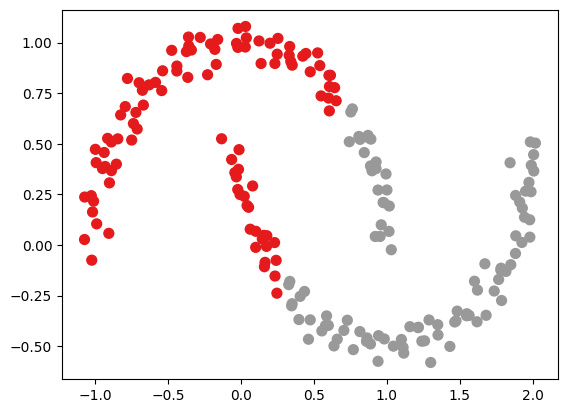

In [ ]:
from sklearn.datasets import make_moons
X, y_true = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='Set1');


More clusters will still be an imperfect solution and this can be seen in the SSE curve.

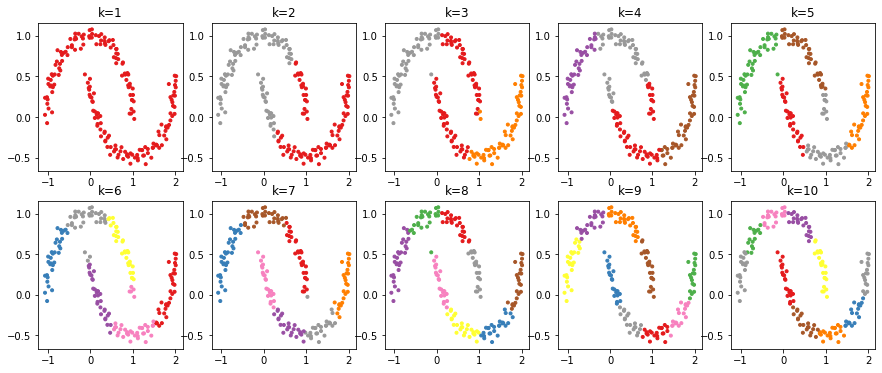

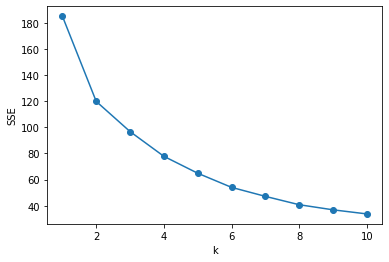

In [ ]:
cost_list = []
fig, ax = plt.subplots(2, 5, figsize=(15,6))
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    # Calculate SSE
    cost = SSE(X, centers, y_kmeans)
    cost_list.append(cost)
    ax[int((k-1)/5),(k-1)%5].title.set_text("k="+str(k))
    ax[int((k-1)/5),(k-1)%5].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=9, cmap='Set1')

fig, ax = plt.subplots(1, 1)
plt.plot(k_range, cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()


Note the absense of a well defined "knee".

Suppose we use a kernel transformation to project the data into a higher dimension where a linear separation becomes possible. We might imagine using the same trick to allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in Scikit-Learn within the **SpectralClustering** estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.

More information:

https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


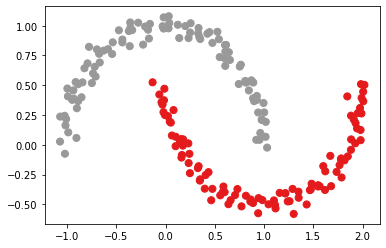

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='Set1');

------------------------------